# M4T1. Ejercicio Práctico 1. Python
## Pablo Olmos

En este Notebook tienes toda la información necesaria para llevar a cabo los siguientes ejercicios:
    
- __Ejercicio 1__: ( 5%) método pandas para ver un análisis estadístico descriptivo 
- __Ejercicio 2__: (10%) Función `extraer_altura`
- __Ejercicio 3__: (10%) Función `extraer_peso`
- __Ejercicio 4__: (25%) Función `clasificacion_oms`
- __Ejercicio 5__: (25%) Función `extraer_datos_debut`
- __Ejercicio 6__: ( 5%) Goles en clubes
- __Ejercicio 7__: ( 5%) Cantidad de imc calculados (`num_imc_calculados`)
- __Ejercicio 8__: ( 5%) Porcentaje jugadores en cada categoria de la OMS
- __Ejercicio 9__: ( 5%) Jugador más delgado y jugador más obeso
- __Ejercicio 10__:( 5%) Jugadores que juegan en el equipo en el que debutaron




- __Ejercicio 11__: (Extra) Realizar una visualizacion de la relacion entre IMC y la posición del jugador en el equipo

## Pasos previos

- Importar las librerías necesarias
- Cargar en una variable llamada `raw_data` el contenido del fichero que se proporciona `my_players_info.csv`
- Se debe usar una ruta relativa en la llamada al fichero `my_players_info.csv`. 

Los pasos previos no sirven para puntuar pero pueden penalizar si no se usa una ruta relativa y si el fichero de datos no está en la ruta relativa que se utiliza (Es decir, el profesor tiene que poder ejecutarlo en su ordenador sin cambiar la ruta y sin incorporar el fichero mencionado)

In [10]:
# Importa aquí las librerías que vayas a utilizar
import pandas as pd
import numpy  as np
import datetime
from datetime import datetime
import re
import warnings
warnings.filterwarnings("ignore")

# Librerías de visualización
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib; matplotlib.style.use('ggplot')

In [16]:
# Crea una variable llamada raw_data de tipo DataFrame que tenga 
# a información del fichero my_players_info.csv
# Establecemos la ruta y el nombre del fichero
path = "./data/my_players_info.csv"

raw_data = pd.read_csv(path, sep=";", )
#df = pd.read_csv(path,  sep=";")
print(raw_data.columns)
raw_data.head(3)

Index(['(goles)', 'Altura', 'Apodo(s)', 'Club', 'Debut', 'Debut deportivo',
       'Deporte', 'Dorsal(es)', 'Entrenador', 'Goles en clubes', 'Liga',
       'Nacimiento', 'Nacionalidad(es)', 'Nombre completo',
       'Nombre de nacimiento', 'Pareja', 'Part.', 'Part. (goles)', 'País',
       'Peso', 'Posición', 'Retirada deportiva', 'Selección', 'nombre'],
      dtype='object')


,(goles),Altura,Apodo(s),Club,Debut,Debut deportivo,Deporte,Dorsal(es),Entrenador,Goles en clubes,...,Nombre de nacimiento,Pareja,Part.,Part. (goles),País,Peso,Posición,Retirada deportiva,Selección,nombre
0,NaN,"1,89 m (6 ft 2 in)","Kepa-Rada, Super Kepa",Chelsea F. C.,11 de noviembre de 2017,NaN,Fútbol,13,NaN,NaN,...,NaN,NaN,3,NaN,NaN,84 kg (185 lb),Portero,NaN,ESP España,Kepa Arrizabalaga
1,NaN,"1,87 m (6 ft 2 in)",NaN,Athletic Club,NaN,2006(C. D. Basconia),Fútbol,13,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,89 kg (196 lb),Portero,NaN,NaN,Iago Herrerín
2,NaN,"1,90 m (6 ft 3 in)",NaN,Athletic Club,NaN,2014(C. D. Basconia),Fútbol,25,NaN,NaN,...,NaN,NaN,4,NaN,España,79 kg (174 lb),Portero,NaN,ESP España (Sub-21),Unai Simón


In [17]:
# Número total de elementos o filas
print("El df raw_data tiene {0} filas y {1} columnas\n".format(len(raw_data),
                                                           len(raw_data.columns)))

El df raw_data tiene 478 filas y 24 columnas



In [18]:
#Tendencia central (excluyendo valores NaN o nulos)
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   (goles)               1 non-null      object
 1   Altura                467 non-null    object
 2   Apodo(s)              156 non-null    object
 3   Club                  472 non-null    object
 4   Debut                 147 non-null    object
 5   Debut deportivo       470 non-null    object
 6   Deporte               478 non-null    object
 7   Dorsal(es)            309 non-null    object
 8   Entrenador            10 non-null     object
 9   Goles en clubes       214 non-null    object
 10  Liga                  399 non-null    object
 11  Nacimiento            478 non-null    object
 12  Nacionalidad(es)      374 non-null    object
 13  Nombre completo       389 non-null    object
 14  Nombre de nacimiento  29 non-null     object
 15  Pareja                11 non-null     ob

In [19]:
raw_data.describe()

,(goles),Altura,Apodo(s),Club,Debut,Debut deportivo,Deporte,Dorsal(es),Entrenador,Goles en clubes,...,Nombre de nacimiento,Pareja,Part.,Part. (goles),País,Peso,Posición,Retirada deportiva,Selección,nombre
count,1,467,156,472,147,470,478,309,10,214,...,29,11,32,204,178,273,477,3,248,478
unique,1,154,153,202,119,450,3,36,10,137,...,29,11,20,121,39,85,74,3,91,474
top,(97),"1,80 m (5 ft 11 in)",Gui,Real Madrid C. F.,29 de mayo de 2016,"2007(F. C. Barcelona ""B"")",Fútbol,7,Ariel Holan,11,...,Aymeric Jean Louis Gerard Alphonse Laporte,Michelle Calvó Pedreira (2016-presente),1,1 (0),España,75 kg (165 lb),Centrocampista,2018(Getafe Club de Fútbol),ESP España,Munir El Haddadi
freq,1,26,2,21,7,2,476,20,1,8,...,1,1,5,29,75,16,93,1,39,2


## Ejercicio 2: 
Valoración 10%
### Función para extraer la altura

Esta función va a consistir en transformar la columna 'Altura' a formato float64

Intrucciones:
 - La función se llama **extraer_altura**
 - La función recibe como parámetro un DataFrame y debe devolver un DataFrame
 - El DataFrame de entrada contiene una columna llamada 'Altura' que es de tipo object
 - El DataFrame de salida contiene una columna llamada 'Altura' de tipo float64
 - La columna 'Altura' de tipo float64 debe mantener los valores nulos que mantenía en el momento de entrar en la función. 

In [20]:
def extraer_altura(df):
    # Sustituye esta línea por las líneas de código que necesites para que 
    # la función cumpla los requisitos mencionados
    
    df['Altura'] = df['Altura'].str[:4]
    df['Altura'] = df['Altura'].str.replace(',','.')
    df['Altura'] = pd.to_numeric(df['Altura'], errors='coerce')
    df['Altura'].fillna(0)
   
    #print (df.dtypes)
    # No modifiques las siguientes lineas 
    assert(isinstance(df, pd.DataFrame))
    return df

In [21]:
extraer_altura(raw_data)

,(goles),Altura,Apodo(s),Club,Debut,Debut deportivo,Deporte,Dorsal(es),Entrenador,Goles en clubes,...,Nombre de nacimiento,Pareja,Part.,Part. (goles),País,Peso,Posición,Retirada deportiva,Selección,nombre
0,NaN,1.89,"Kepa-Rada, Super Kepa",Chelsea F. C.,11 de noviembre de 2017,NaN,Fútbol,13,NaN,NaN,...,NaN,NaN,3,NaN,NaN,84 kg (185 lb),Portero,NaN,ESP España,Kepa Arrizabalaga
1,NaN,1.87,NaN,Athletic Club,NaN,2006(C. D. Basconia),Fútbol,13,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,89 kg (196 lb),Portero,NaN,NaN,Iago Herrerín
2,NaN,1.90,NaN,Athletic Club,NaN,2014(C. D. Basconia),Fútbol,25,NaN,NaN,...,NaN,NaN,4,NaN,España,79 kg (174 lb),Portero,NaN,ESP España (Sub-21),Unai Simón
3,NaN,1.81,NaN,Deportivo de La Coruña,NaN,2000(Athletic Club),Fútbol,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,77 kg (169 lb),Lateral derechoDefensa central derecho,NaN,NaN,Eneko Bóveda
4,NaN,1.87,NaN,Maccabi Tel Aviv Football Club,21 de agosto de 2010,2010( Club Deportivo Basconia),Fútbol,4,NaN,8[1]​,...,NaN,NaN,NaN,2 (0),España España,73 kg (161 lb),Defensa,NaN,ESP España sub-19,Enric Saborit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,NaN,1.67,LeoMagoEnano,Real Valladolid,NaN,9 de noviembre de 2014(Boca Juniors),Fútbol,20,NaN,6 (62 PJ),...,NaN,NaN,NaN,NaN,Argentina Argentina,57 kg (125 lb),Mediocampista,NaN,NaN,Leonardo Suárez
474,NaN,1.81,El ChacalEl Peluca[1]​,Villarreal,NaN,2005(Barranquilla F. C.),Fútbol,7,NaN,246 (493 PJ),...,NaN,NaN,NaN,52 (16),Colombia Colombia,77 kg (169 lb),Delantero,NaN,Colombia,Carlos Bacca
475,NaN,1.80,Chapulín.[1]​,C. América,29 de mayo de 2016,2013(Racing C.),Fútbol,15,Miguel Herrera,37,...,NaN,NaN,NaN,7 (1),NaN,86 kg (189 lb),Delantero,NaN,COL Colombia,Roger Martínez
476,NaN,1.75,NaN,Villarreal C. F.,16 de junio de 2015,2009(Bayern de Múnich II),Fútbol,17,NaN,NaN,...,NaN,NaN,NaN,3 (0),NaN,NaN,Delantero,NaN,ITA Italia,Nicola Sansone


## Ejercicio 3: 
Valoración 10%
### Función para extraer el peso

Esta función va a consistir en transformar la columna 'Peso' a formato float64

Intrucciones:
 - La función se llama **extraer_peso**
 - La función recibe como parámetro un DataFrame y debe devolver un DataFrame
 - El DataFrame de entrada contiene una columna llamada 'Peso' que es de tipo object
 - El DataFrame de salida contiene una columna llamada 'Peso' de tipo float64
 - La columna 'Peso' de tipo float64 debe mantener los valores nulos que mantenía en el momento de entrar en la función


In [22]:
def extraer_peso(df):
    # Sustituye esta línea por las líneas de código que necesites para que 
    # la función cumpla los requisitos anteriores
    df['Peso'] = df['Peso'].str[:2]
    df['Peso'] = pd.to_numeric(df['Peso'], errors='coerce')
    df['Peso'].fillna(0)
    #print (df.dtypes)
    # No modifiques las siguientes lineas 
    assert(isinstance(df, pd.DataFrame))
    return df

In [23]:
extraer_peso(raw_data)

,(goles),Altura,Apodo(s),Club,Debut,Debut deportivo,Deporte,Dorsal(es),Entrenador,Goles en clubes,...,Nombre de nacimiento,Pareja,Part.,Part. (goles),País,Peso,Posición,Retirada deportiva,Selección,nombre
0,NaN,1.89,"Kepa-Rada, Super Kepa",Chelsea F. C.,11 de noviembre de 2017,NaN,Fútbol,13,NaN,NaN,...,NaN,NaN,3,NaN,NaN,84.0,Portero,NaN,ESP España,Kepa Arrizabalaga
1,NaN,1.87,NaN,Athletic Club,NaN,2006(C. D. Basconia),Fútbol,13,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,89.0,Portero,NaN,NaN,Iago Herrerín
2,NaN,1.90,NaN,Athletic Club,NaN,2014(C. D. Basconia),Fútbol,25,NaN,NaN,...,NaN,NaN,4,NaN,España,79.0,Portero,NaN,ESP España (Sub-21),Unai Simón
3,NaN,1.81,NaN,Deportivo de La Coruña,NaN,2000(Athletic Club),Fútbol,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,77.0,Lateral derechoDefensa central derecho,NaN,NaN,Eneko Bóveda
4,NaN,1.87,NaN,Maccabi Tel Aviv Football Club,21 de agosto de 2010,2010( Club Deportivo Basconia),Fútbol,4,NaN,8[1]​,...,NaN,NaN,NaN,2 (0),España España,73.0,Defensa,NaN,ESP España sub-19,Enric Saborit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,NaN,1.67,LeoMagoEnano,Real Valladolid,NaN,9 de noviembre de 2014(Boca Juniors),Fútbol,20,NaN,6 (62 PJ),...,NaN,NaN,NaN,NaN,Argentina Argentina,57.0,Mediocampista,NaN,NaN,Leonardo Suárez
474,NaN,1.81,El ChacalEl Peluca[1]​,Villarreal,NaN,2005(Barranquilla F. C.),Fútbol,7,NaN,246 (493 PJ),...,NaN,NaN,NaN,52 (16),Colombia Colombia,77.0,Delantero,NaN,Colombia,Carlos Bacca
475,NaN,1.80,Chapulín.[1]​,C. América,29 de mayo de 2016,2013(Racing C.),Fútbol,15,Miguel Herrera,37,...,NaN,NaN,NaN,7 (1),NaN,86.0,Delantero,NaN,COL Colombia,Roger Martínez
476,NaN,1.75,NaN,Villarreal C. F.,16 de junio de 2015,2009(Bayern de Múnich II),Fútbol,17,NaN,NaN,...,NaN,NaN,NaN,3 (0),NaN,NaN,Delantero,NaN,ITA Italia,Nicola Sansone


## Ejercicio 4: 
Valoracion 20%
### Calcular la categoría de la OMS usando el Indice de masa Corporal (IMC)

Formula para el cálculo de Indice de Masa Corporal IMC =  masa(kg) / estatura(m) * estatura(m)


Intrucciones:
 - La función se llama **clasificacion_oms**
 - La función recibe como parámetro un DataFrame y debe devolver un DataFrame
 - El DataFrame de entrada contiene, entre otras, dos columnas llamadas 'Peso' y 'Altura' que son de tipo float64 
 - El DataFrame de salida contiene las mismas columnas que el DataFrame de entrada y además añade dos columnas nuevas: 'IMC' y 'clasificacoin_oms':
     - La columna 'IMC' ,de tipo float64, que tiene el cálculo del Indice de Masa Corportal
     - La columna 'clasificacion_oms', de tipo str o factor, que tiene los siguientes valores:
         - "delgadez" cuando IMC < 18.5
         - "normal" cuadno IMC >=18.50 y IMC < 25.0
         - "sobrepeso" cuando IMC >=25 y IMC < 30
         - "obeso" cuadno IMC >= 30 
     - La columna 'clasificacoin_oms' solo puede tener como valor "delgadez", "normal", "sobrepeso", "obeso" y nulo. 



In [24]:
raw_data = pd.read_csv(path, sep=";" )
df_4 = extraer_altura(raw_data) # Esta linea es obligatoria
df_4 = extraer_peso(df_4) # Esta linea es obligatoria
def clasificacion_oms(df):

    # Sustituye esta línea por las líneas de código que necesites para que 
    # la función cumpla los requisitos anteriores
    df['imc']= df['Peso'] / (df['Altura']*df['Altura'])
    
    #definimos las reglas
    df['clasificacion_oms'] = np.where(df['imc']>= 30, 'obeso', 
                                 np.where(df['imc']>= 25, 'sobrepeso', 
                                    np.where(df['imc']>= 18.5, 'normal', 
                                          np.where(df['imc']< 18.5, 'delgadez', 
                                                                             'nulo'))))
    
    # No modifiques las siguientes lineas 
    assert(isinstance(df, pd.DataFrame))
   
    return df 


In [25]:
clasificacion_oms(df_4)

,(goles),Altura,Apodo(s),Club,Debut,Debut deportivo,Deporte,Dorsal(es),Entrenador,Goles en clubes,...,Part.,Part. (goles),País,Peso,Posición,Retirada deportiva,Selección,nombre,imc,clasificacion_oms
0,NaN,1.89,"Kepa-Rada, Super Kepa",Chelsea F. C.,11 de noviembre de 2017,NaN,Fútbol,13,NaN,NaN,...,3,NaN,NaN,84.0,Portero,NaN,ESP España,Kepa Arrizabalaga,23.515579,normal
1,NaN,1.87,NaN,Athletic Club,NaN,2006(C. D. Basconia),Fútbol,13,NaN,NaN,...,NaN,NaN,NaN,89.0,Portero,NaN,NaN,Iago Herrerín,25.451114,sobrepeso
2,NaN,1.90,NaN,Athletic Club,NaN,2014(C. D. Basconia),Fútbol,25,NaN,NaN,...,4,NaN,España,79.0,Portero,NaN,ESP España (Sub-21),Unai Simón,21.883657,normal
3,NaN,1.81,NaN,Deportivo de La Coruña,NaN,2000(Athletic Club),Fútbol,4,NaN,NaN,...,NaN,NaN,NaN,77.0,Lateral derechoDefensa central derecho,NaN,NaN,Eneko Bóveda,23.503556,normal
4,NaN,1.87,NaN,Maccabi Tel Aviv Football Club,21 de agosto de 2010,2010( Club Deportivo Basconia),Fútbol,4,NaN,8[1]​,...,NaN,2 (0),España España,73.0,Defensa,NaN,ESP España sub-19,Enric Saborit,20.875633,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,NaN,1.67,LeoMagoEnano,Real Valladolid,NaN,9 de noviembre de 2014(Boca Juniors),Fútbol,20,NaN,6 (62 PJ),...,NaN,NaN,Argentina Argentina,57.0,Mediocampista,NaN,NaN,Leonardo Suárez,20.438166,normal
474,NaN,1.81,El ChacalEl Peluca[1]​,Villarreal,NaN,2005(Barranquilla F. C.),Fútbol,7,NaN,246 (493 PJ),...,NaN,52 (16),Colombia Colombia,77.0,Delantero,NaN,Colombia,Carlos Bacca,23.503556,normal
475,NaN,1.80,Chapulín.[1]​,C. América,29 de mayo de 2016,2013(Racing C.),Fútbol,15,Miguel Herrera,37,...,NaN,7 (1),NaN,86.0,Delantero,NaN,COL Colombia,Roger Martínez,26.543210,sobrepeso
476,NaN,1.75,NaN,Villarreal C. F.,16 de junio de 2015,2009(Bayern de Múnich II),Fútbol,17,NaN,NaN,...,NaN,3 (0),NaN,NaN,Delantero,NaN,ITA Italia,Nicola Sansone,NaN,nulo


## Ejercicio 5:
Valoración 25%
### Función para extraer el club en el que debutó y el año de debut
Esta función va a consistir en extraer y unificar la información del debut del jugador. 

El DataFrame tiene información del Debut en las columnas 'Debut' y 'Debut deportivo'. Aprovecha para ver el contenido de estas dos columnas. Verás que unos jugadores tienen información sobre su debut únicamente en la columna 'Debut', otros jugadores tienen solo información en la columna 'Debut deportivo' y otros jugadores tienen información sobre su debut deportivo en ambas columnas ('Debut' y 'Debut deportivo')

La columna 'Debut' tiene la fecha del debut del jugador en formato "< dia > de < mes > de < año >"
La columna 'Debut deportivo' tiene la información sin unificar pues ocurren varios casos:
    * Caso 1 la columna tiene "< año > (<club_en_el_que_debutó>)"
    * Caso 2 la columna tiene "< dia > de < mes > de < año >(<club_en_el_que_debutó>)"
En cualquier caso de la columna 'Debut deportivo' solo extraremos el año y el club en el que debutó. 
Ejemplo:

In [26]:
raw_data[['Debut','Debut deportivo']].tail(3)

,Debut,Debut deportivo
475,29 de mayo de 2016,2013(Racing C.)
476,16 de junio de 2015,2009(Bayern de Múnich II)
477,31 de marzo de 2015,1 de agosto de 2013(Bursaspor)


In [27]:
def find_year(x):
    # print(x)
    año = re.search('\d{4}', x)
    return int(año.group(0)) if año else 0

Ejemplo: 
```    
Estado actual
Debut                  Debut deportivo                     
27 de mayo de 2006 	   2006(UD Vecindario)              
21 de agosto de 2010   11 de agosto de 2010(Portuguesa)
21 de agosto de 2010   NaN 
NaN                    NaN 

OBJETIVO a conseguir

fecha_debut    club_debut    
2006           UD Vecindario
2010           Portuguesa
2014           Atlético de Madrid "B"
2010           NaN
Nan            NaN    
```

Separamos la información del año de debut y del club de debut para generar dos nuevas columnas. 

Si se da el caso que 'Debut' tiene un año diferente al de 'Debut deportivo' nos quedaremos con el año indicado en 'Debut deportivo' 

Intrucciones:
 - La función se llama **extraer_datos_debut**
    
 - La función recibe como parámetro un DataFrame y debe devolver un DataFrame
    
 - El DataFrame de entrada contiene una columna llamada 'Debut' y una columna llamada 'Debut deportivo' que son de tipo object
    
 - El DataFrame de salida contiene el mismo número de columnas que el DataFrame de entrada porque **añade dos columnas nuevas**: `fecha_debut` de tipo int32 y `club_debut` de tipo object (que equivale a str) y **elimina dos columnas**: `Debut` y `Debut deportivo`
    
 - La columna 'fecha_debut' solo tendrá valores nulos cuando las columnas 'Debut' y 'Debut deportivo' tengan valores nulos
    
 - La columna 'club_debut' tendrá valores nulos cuando 'Debut deportivo' tenga valores nulos 
    

 

In [28]:
def extraer_datos_debut(df):
    # Sustituye esta línea por las líneas de código que necesites para que 
    # la función cumpla los requisitos anteriores
    df['Debut']=df['Debut'].apply(str)
    df['fecha_debut'] = df['Debut'].map(find_year)
    
    df['Debut deportivo']=df['Debut deportivo'].apply(str)
    df['club_debut']= df['Debut deportivo'].apply(lambda st: st[st.find("(")+1:st.find(")")])
    
    # No modifiques las siguientes lineas 
    assert(isinstance(df, pd.DataFrame))
    return df    

In [29]:
extraer_datos_debut(df_4)

,(goles),Altura,Apodo(s),Club,Debut,Debut deportivo,Deporte,Dorsal(es),Entrenador,Goles en clubes,...,País,Peso,Posición,Retirada deportiva,Selección,nombre,imc,clasificacion_oms,fecha_debut,club_debut
0,NaN,1.89,"Kepa-Rada, Super Kepa",Chelsea F. C.,11 de noviembre de 2017,nan,Fútbol,13,NaN,NaN,...,NaN,84.0,Portero,NaN,ESP España,Kepa Arrizabalaga,23.515579,normal,2017,na
1,NaN,1.87,NaN,Athletic Club,nan,2006(C. D. Basconia),Fútbol,13,NaN,NaN,...,NaN,89.0,Portero,NaN,NaN,Iago Herrerín,25.451114,sobrepeso,0,C. D. Basconia
2,NaN,1.90,NaN,Athletic Club,nan,2014(C. D. Basconia),Fútbol,25,NaN,NaN,...,España,79.0,Portero,NaN,ESP España (Sub-21),Unai Simón,21.883657,normal,0,C. D. Basconia
3,NaN,1.81,NaN,Deportivo de La Coruña,nan,2000(Athletic Club),Fútbol,4,NaN,NaN,...,NaN,77.0,Lateral derechoDefensa central derecho,NaN,NaN,Eneko Bóveda,23.503556,normal,0,Athletic Club
4,NaN,1.87,NaN,Maccabi Tel Aviv Football Club,21 de agosto de 2010,2010( Club Deportivo Basconia),Fútbol,4,NaN,8[1]​,...,España España,73.0,Defensa,NaN,ESP España sub-19,Enric Saborit,20.875633,normal,2010,Club Deportivo Basconia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,NaN,1.67,LeoMagoEnano,Real Valladolid,nan,9 de noviembre de 2014(Boca Juniors),Fútbol,20,NaN,6 (62 PJ),...,Argentina Argentina,57.0,Mediocampista,NaN,NaN,Leonardo Suárez,20.438166,normal,0,Boca Juniors
474,NaN,1.81,El ChacalEl Peluca[1]​,Villarreal,nan,2005(Barranquilla F. C.),Fútbol,7,NaN,246 (493 PJ),...,Colombia Colombia,77.0,Delantero,NaN,Colombia,Carlos Bacca,23.503556,normal,0,Barranquilla F. C.
475,NaN,1.80,Chapulín.[1]​,C. América,29 de mayo de 2016,2013(Racing C.),Fútbol,15,Miguel Herrera,37,...,NaN,86.0,Delantero,NaN,COL Colombia,Roger Martínez,26.543210,sobrepeso,2016,Racing C.
476,NaN,1.75,NaN,Villarreal C. F.,16 de junio de 2015,2009(Bayern de Múnich II),Fútbol,17,NaN,NaN,...,NaN,NaN,Delantero,NaN,ITA Italia,Nicola Sansone,NaN,nulo,2015,Bayern de Múnich II


## Ejercicio 6: 
Valoración 5%
### Función para los goles en clubes

La información de los Goles totales en clubes está almacenada en la columna 'Goles en clubes', que hay que transfomar en un float64

Intrucciones:
 - Usa la función `to_numeric` para extraer el valor numérico de la columna 'Goles en clubes'
 - Ten en cuenta que si el parseo no es posible debe asignar NaN como valor. 


In [30]:
df_4['Goles en clubes']= df_4['Goles en clubes'].str.replace(r"\[.*\]","").str.strip()
df_4['Goles en clubes']= df_4['Goles en clubes'].str.replace(r"\(.*\)","").str.strip()

In [31]:
df_4['Goles en clubes'] = pd.to_numeric(df_4['Goles en clubes'], errors='coerce')
df_4['Goles en clubes'].fillna(0)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
       ...  
473      6.0
474    246.0
475     37.0
476      0.0
477     24.0
Name: Goles en clubes, Length: 478, dtype: float64

In [32]:
df_4['Goles en clubes'].describe()

count    209.000000
mean      39.952153
std       71.742378
min      -85.000000
25%        7.000000
50%       19.000000
75%       43.000000
max      583.000000
Name: Goles en clubes, dtype: float64



# Usando código python responde a las siguientes preguntas: 

## Ejercicio 7:
valor 5%: 

Guarda en la variable `num_imc_calculados`el total de jugadores para los que se ha podido calcular el IMC


In [33]:
df_4['clasificacion_oms'].value_counts()

normal       251
nulo         209
sobrepeso     14
obeso          2
delgadez       2
Name: clasificacion_oms, dtype: int64

In [34]:
num_imc_calculados =  np.sum(df_4['clasificacion_oms'] != 'nulo')

In [35]:
num_imc_calculados 

269

## Ejercicio 8:
valor 5%: 
        - Porcetaje de jugadores que se encuentran en peso tipo Delgadez
        - Porcetaje de jugadores que se encuentran en peso tipo Normal
        - Porcetaje de jugadores que se encuentran en peso tipo Sobrepeso
        - Porcetaje de jugadores que se encuentran en peso tipo Obeso

Es posible hacerlo en una linea de código 

In [74]:
# Escribe aqui tu código 
(df_4.clasificacion_oms.value_counts() / len(df_4.clasificacion_oms))*100

normal       52.510460
nulo         43.723849
sobrepeso     2.928870
obeso         0.418410
delgadez      0.418410
Name: clasificacion_oms, dtype: float64

## Ejercicio 9:
valor 5%: 

Guarda en la variable `jugador_mas_delgado` el Nombre, Posición, IMC y Club del jugador cuyo IMC sea el menor de todos

Guarda en la variable `jugador_mas_obeso` el Nombre, Posición, IMC y Club del jugador cuyo IMC sea el mayor de todos

In [37]:
minValuesObj = df_4['imc'].min()

In [38]:
minValuesObj

3.419855682090216

In [39]:
rslt_df = df_4[df_4['imc'] ==minValuesObj] 

In [40]:
rslt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 293 to 293
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (goles)               0 non-null      object 
 1   Altura                1 non-null      float64
 2   Apodo(s)              0 non-null      object 
 3   Club                  1 non-null      object 
 4   Debut                 1 non-null      object 
 5   Debut deportivo       1 non-null      object 
 6   Deporte               1 non-null      object 
 7   Dorsal(es)            1 non-null      object 
 8   Entrenador            0 non-null      object 
 9   Goles en clubes       1 non-null      float64
 10  Liga                  1 non-null      object 
 11  Nacimiento            1 non-null      object 
 12  Nacionalidad(es)      1 non-null      object 
 13  Nombre completo       1 non-null      object 
 14  Nombre de nacimiento  1 non-null      object 
 15  Pareja                0

In [41]:
jugador_mas_delgado = rslt_df[['Nombre completo','Club','Posición','imc','Peso','Altura']] 

In [42]:
jugador_mas_delgado

,Nombre completo,Club,Posición,imc,Peso,Altura
293,Marlos Moreno Durán,C. R. Flamengo,Extremo izquierdo,3.419856,10.0,1.71


In [43]:
jugador_mas_delgado.iloc[0]

Nombre completo    Marlos Moreno Durán
Club                    C. R. Flamengo
Posición             Extremo izquierdo
imc                            3.41986
Peso                                10
Altura                            1.71
Name: 293, dtype: object

Se ve que es un error de codificación, exigimos las condicion de que pese al menos 50 kg

In [44]:
condition = df_4[df_4["Peso"] > 49]

In [45]:
minValuesObj = condition['imc'].min()

In [46]:
minValuesObj

19.753086419753085

In [47]:
rslt_df = condition[condition['imc'] ==minValuesObj] 

In [48]:
jugador_mas_delgado = rslt_df[['Nombre completo','Club','Posición','imc']] 

In [49]:
jugador_mas_delgado

,Nombre completo,Club,Posición,imc
418,Gonçalo Manuel Ganchinho Guedes,Valencia C.F.,Extremo,19.753086


In [50]:
jugador_mas_delgado=jugador_mas_delgado.iloc[0]

In [51]:
jugador_mas_delgado

Nombre completo    Gonçalo Manuel Ganchinho Guedes
Club                                 Valencia C.F.
Posición                                   Extremo
imc                                        19.7531
Name: 418, dtype: object

### Jugador Más Obeso

In [52]:
maxValuesObj = df_4['imc'].max()

In [53]:
maxValuesObj

58.67768595041321

In [54]:
rslt2_df = df_4[df_4['imc'] ==maxValuesObj] 

In [55]:
rslt2_df

,(goles),Altura,Apodo(s),Club,Debut,Debut deportivo,Deporte,Dorsal(es),Entrenador,Goles en clubes,...,País,Peso,Posición,Retirada deportiva,Selección,nombre,imc,clasificacion_oms,fecha_debut,club_debut
200,NaN,1.1,NaN,F. C. Barcelona,nan,"17 de agosto de 2013(F. C. Barcelona ""B"")",Fútbol,NaN,NaN,NaN,...,España,71.0,Centrocampista,NaN,NaN,Sergi Samper,58.677686,obeso,0,"F. C. Barcelona ""B"""
363,NaN,1.1,NaN,F. C. Barcelona,nan,"17 de agosto de 2013(F. C. Barcelona ""B"")",Fútbol,NaN,NaN,NaN,...,España,71.0,Centrocampista,NaN,NaN,Sergi Samper,58.677686,obeso,0,"F. C. Barcelona ""B"""


In [56]:
jugador_mas_obeso = rslt2_df[['Nombre completo','Club','Posición','imc','Peso','Altura']] 

In [57]:
jugador_mas_obeso

,Nombre completo,Club,Posición,imc,Peso,Altura
200,Sergi Samper Montaña,F. C. Barcelona,Centrocampista,58.677686,71.0,1.1
363,Sergi Samper Montaña,F. C. Barcelona,Centrocampista,58.677686,71.0,1.1


Vemos en este caso que existe un error de grabaciòn, no existen futbolistas profesionales de 1,1 metros de alura. Exigimos que pesen mas de 49 kilos y que midan al menos 1.5 metros de altura

In [58]:
condition2 = df_4[(df_4["Peso"] > 49) & (df_4["Altura"] >1.5) ]

In [59]:
maxValuesObj = condition2['imc'].max()

In [60]:
maxValuesObj

26.54320987654321

In [61]:
rslt2_df = df_4[df_4['imc'] ==maxValuesObj] 

In [62]:
rslt2_df

,(goles),Altura,Apodo(s),Club,Debut,Debut deportivo,Deporte,Dorsal(es),Entrenador,Goles en clubes,...,País,Peso,Posición,Retirada deportiva,Selección,nombre,imc,clasificacion_oms,fecha_debut,club_debut
475,NaN,1.8,Chapulín.[1]​,C. América,29 de mayo de 2016,2013(Racing C.),Fútbol,15,Miguel Herrera,37.0,...,NaN,86.0,Delantero,NaN,COL Colombia,Roger Martínez,26.54321,sobrepeso,2016,Racing C.


In [63]:
jugador_mas_obeso = rslt2_df[['Nombre completo','Club','Posición','imc','Peso','Altura']] 

In [64]:
jugador_mas_obeso

,Nombre completo,Club,Posición,imc,Peso,Altura
475,Roger Beyker Martínez Tobinson,C. América,Delantero,26.54321,86.0,1.8


In [65]:
jugador_mas_obeso = rslt2_df[['Nombre completo','Club','Posición','imc']] 

In [66]:
jugador_mas_obeso=jugador_mas_obeso.iloc[0]

In [67]:
jugador_mas_obeso

Nombre completo    Roger Beyker Martínez Tobinson
Club                                   C. América
Posición                                Delantero
imc                                       26.5432
Name: 475, dtype: object

## Ejercicio 10:
Valor 5%

Guarda en la variable `df_debutantes` de tipo DataFrame la información sobre qué jugadores coincide el nombre del Club en el que juega y 'club_debut' (o club en el que debutaron). Es decir, los jugadores que aún juegen en el equipo en el que debutaron

In [68]:
# Termina la asignacion de la variable
df_debutantes = df_4[['Nombre completo','club_debut','Club']]

In [69]:
df_debutantes=df_4[df_4.club_debut == df_4.Club]

In [70]:
df_debutantes

,(goles),Altura,Apodo(s),Club,Debut,Debut deportivo,Deporte,Dorsal(es),Entrenador,Goles en clubes,...,País,Peso,Posición,Retirada deportiva,Selección,nombre,imc,clasificacion_oms,fecha_debut,club_debut
12,NaN,1.75,NaN,Athletic Club,nan,2006(Athletic Club),Fútbol,7,NaN,NaN,...,NaN,72.0,Mediocentro,NaN,Selección de fútbol de España,Beñat Etxebarria,23.510204,normal,0,Athletic Club
23,NaN,1.87,Pantera[1]​,Athletic Club,29 de mayo de 2016,6 de diciembre de 2014(Athletic Club),Fútbol,15,NaN,NaN,...,NaN,77.0,Extremo,NaN,España España,Iñaki Williams,22.019503,normal,2016,Athletic Club
25,NaN,1.82,El Zorro,Athletic Club,9 de octubre de 2010,2002(Athletic Club),Fútbol,20,NaN,278.0,...,España,78.0,delantero centro,NaN,España,Aritz Aduriz,23.547881,normal,2010,Athletic Club
26,NaN,1.74,O Gato de Catoira,Real Club Celta de Vigo,nan,2011(Real Club Celta de Vigo),Fútbol,NaN,NaN,NaN,...,España,NaN,Portero,NaN,NaN,Sergio Álvarez Conde,NaN,nulo,0,Real Club Celta de Vigo
27,NaN,1.88,NaN,Celta de Vigo,30 de marzo de 2015,26 de mayo de 2013(Celta de Vigo),Fútbol,13,NaN,-85.0,...,España,70.0,Guardameta,NaN,Sub-21,Rubén Blanco,19.805342,normal,2015,Celta de Vigo
29,NaN,1.80,NaN,Real Club Celta de Vigo,nan,2009(Real Club Celta de Vigo),Fútbol,2,NaN,NaN,...,España,NaN,Lateral derecho,NaN,NaN,Hugo Mallo,NaN,nulo,0,Real Club Celta de Vigo
148,NaN,1.82,NaN,Real Madrid C. F.,nan,19 de mayo de 2018(Real Madrid C. F.),Fútbol,30,NaN,NaN,...,NaN,76.0,Guardameta,NaN,NaN,Luca Zidane,22.944089,normal,0,Real Madrid C. F.
170,NaN,1.79,O'Rei,Rio Ave,14/11/2009,2008(Rio Ave),Fútbol,NaN,NaN,NaN,...,NaN,38.0,Lateral izquierdo,NaN,Portugal Portugal,Fábio Coentrão,11.859805,delgadez,2009,Rio Ave
172,NaN,1.82,NaN,Cruzeiro,24 de mayo de 2014,18 de julio de 2012(Cruzeiro),Fútbol,16,NaN,4.0,...,NaN,80.0,"Medio centro, Medio centro defensivo",NaN,BRA Brasil (Sub-23),Lucas Silva Borges,24.151673,normal,2014,Cruzeiro
196,NaN,1.70,"Leo, Lío,[1]​La Pulga,[2]​ El Messías,[3]​ D10...",F. C. Barcelona,17 de agosto de 2005,16 de octubre de 2004(F. C. Barcelona),Fútbol,10,NaN,566.0,...,NaN,72.0,"Delantero, centrocampista",NaN,ARG Argentina,Lionel Messi,24.913495,normal,2005,F. C. Barcelona


In [71]:
df_debutantes[['Nombre completo','club_debut','Club']]

,Nombre completo,club_debut,Club
12,Beñat Etxebarria Urkiaga,Athletic Club,Athletic Club
23,Iñaki Williams Arthuer,Athletic Club,Athletic Club
25,Aritz Aduriz Zubeldia,Athletic Club,Athletic Club
26,Sergio Álvarez Conde,Real Club Celta de Vigo,Real Club Celta de Vigo
27,Rubén Santiago Blanco Veiga,Celta de Vigo,Celta de Vigo
29,Hugo Mallo Novegil,Real Club Celta de Vigo,Real Club Celta de Vigo
148,NaN,Real Madrid C. F.,Real Madrid C. F.
170,Fábio Benito Silva Coentrão Fabela dos Santos,Rio Ave,Rio Ave
172,Lucas Silva Borges,Cruzeiro,Cruzeiro
196,Lionel Andrés Messi Cuccittini,F. C. Barcelona,F. C. Barcelona


## Ejercicio 11:
Valor extra%

#### Realizar una visualizacion que permita ver la relacion entre IMC y la posición del jugador en el equipo

Es necesario que se categorize el nombre de la posición en la que juega el jugador

Este ejercicio sirve solo para sumar y la cantidad dependerá de la calidad del trabajo realizado. 

Primero generaremos 2 grupos de futbolistas, uno en el que hallamos podido calcular el IMC y otro en el que no

In [680]:
df_imc_ok=df_4[df_4['imc']>0]

In [681]:
df_imc_ok.head(5)

,(goles),Altura,Apodo(s),Club,Debut,Debut deportivo,Deporte,Dorsal(es),Entrenador,Goles en clubes,...,Posición,Retirada deportiva,Selección,nombre,aniodebut,prueba,fecha_debut,club_debut,imc,clasificacion_oms
0,NaN,1.89,"Kepa-Rada, Super Kepa",Chelsea F. C.,11 de noviembre de 2017,nan,Fútbol,13,NaN,NaN,...,portero,NaN,ESP España,Kepa Arrizabalaga,2017,na,2017,na,23.515579,normal
1,NaN,1.87,NaN,Athletic Club,nan,2006(C. D. Basconia),Fútbol,13,NaN,NaN,...,portero,NaN,NaN,Iago Herrerín,0,C. D. Basconia,0,C. D. Basconia,25.451114,sobrepeso
2,NaN,1.90,NaN,Athletic Club,nan,2014(C. D. Basconia),Fútbol,25,NaN,NaN,...,portero,NaN,ESP España (Sub-21),Unai Simón,0,C. D. Basconia,0,C. D. Basconia,21.883657,normal
3,NaN,1.81,NaN,Deportivo de La Coruña,nan,2000(Athletic Club),Fútbol,4,NaN,NaN,...,lateral derechodefensa central derecho,NaN,NaN,Eneko Bóveda,0,Athletic Club,0,Athletic Club,23.503556,normal
4,NaN,1.87,NaN,Maccabi Tel Aviv Football Club,21 de agosto de 2010,2010( Club Deportivo Basconia),Fútbol,4,NaN,8[1]​,...,defensa,NaN,ESP España sub-19,Enric Saborit,2010,Club Deportivo Basconia,2010,Club Deportivo Basconia,20.875633,normal


In [682]:
df_imc_ok['Posición'] = df_imc_ok['Posición'].apply(lambda x: str(x).lower())
df_imc_ok['Posición'].value_counts()

centrocampista                                    48
delantero                                         41
defensa                                           29
portero                                           15
lateral izquierdo                                 15
defensa central                                   13
lateral derecho                                   12
extremo                                           12
guardameta                                        11
mediocentro                                        7
delantero centro                                   6
mediocampista                                      5
extremo derecho                                    4
lateral                                            4
mediocentro defensivo                              3
pivote                                             3
defensor central                                   3
interior izquierdo                                 2
mediapunta                                    

#### Vamos reducir la granularidad para poder trabajar

In [683]:
posiciones = {'guardameta': 'portero',
              'arquero':'portero',
               'extremo derecho':'extremo',
               'extremo':'extremo',
               'extremo izquierdo':'extremo',
               'extremo izquierdo|mediapunta':'extremo',
               'extremo derechosegundo delantero' : "extremo",
               'extremomediapunta' : "extremo", 
               'interior/extremo izquierdo':'extremo',
               'centrocampista / extremo': "extremo",
               'delantero extremo' : "extremo",
               'mediocentro':'centrocampista defensivo',
               "medio": "centrocampista",             
               'mediocampista': "centrocampista",
               'pivote': "centrocampista defensivo",
               'mediocentro defensivo' : "centrocampista defensivo",
               'volante de marca' : "centrocampista defensivo",
               'defensa central mediocentro defensivo' : "centrocampista defensivo",
               'volante' : "centrocampista",
               'mediapunta': "mediapunta",
               'medio centro ofensivo/interior derecho' : "mediapunta",
               "centrocampista ofensivo": "mediapunta",
               'mediapuntainterior izquierdo': "mediapunta",
               'mediapuntainterior derecho' : "mediapunta", 
               'centrocampista defensivo': "centrocampista defensivo",
               'defensa central mediocentro defensivo ': "centrocampista defensivo",
               'medio centro, medio centro defensivo': "centrocampista defensivo",
                'lateral derechomediocentro defensivo': "centrocampista defensivo",
               'interior izquierdo': "centrocampista",               
               'interior derecho': "centrocampista",
               'mediapuntainterior derecho' : "centrocampista",              
               "defensor" : "defensa",
               'defensa central mediocentro defensivo ' : "defensa",
               "defensor central"  : "defensa",
               "centrodelantero" : "delantero",
               "delantero centro" : "delantero",
               'lateral izquierdo/interior izquierdo' :'lateral izquierdo',
               'defensa central/lateral izquierdo' : 'lateral izquierdo',
               'delantero, centrocampista' : "delantero",
               'interior derecho interior izquierdo': "centrocampista",
               'lateral derecho , extremo derecho , mediapunta' : "defensa",
               'lateral derechodefensa central derecho' : "defensa",
               'defensa centrallateral' : "defensa",
               'central' : "defensa",
               'lateral' : "defensa",
               'defensa central': "defensa"
             }


df_imc_ok['Posición'] = df_imc_ok['Posición'].replace(posiciones)
df_imc_ok['Posición'].value_counts()

centrocampista              60
defensa                     55
delantero                   50
portero                     26
extremo                     24
centrocampista defensivo    19
lateral izquierdo           17
lateral derecho             12
mediapunta                   5
nan                          1
Name: Posición, dtype: int64

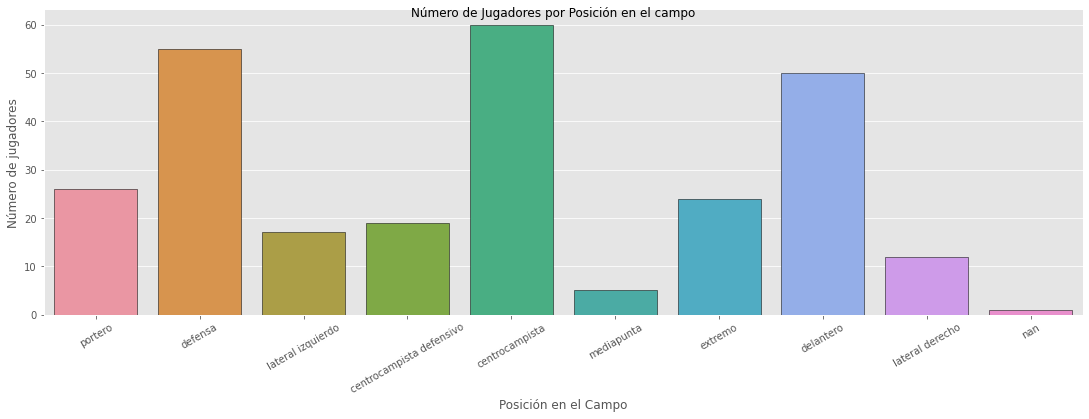

In [684]:
sns_plot = sns.catplot(x='Posición', data=df_imc_ok, kind="count", height=5,
                          aspect=3, edgecolor='black');

sns_plot.set_xticklabels(rotation=30)
sns_plot.fig.suptitle("Número de Jugadores por Posición en el campo")
sns_plot.set_ylabels("Número de jugadores")
sns_plot.set_xlabels("Posición en el Campo")

In [685]:
df_imc_ok[df_imc_ok['Posición'] == 'defensa']['imc'].describe()

count    55.000000
mean     23.198734
std       1.009063
min      20.875633
25%      22.634676
50%      23.087868
75%      23.975154
max      25.617284
Name: imc, dtype: float64

In [686]:
df_imc_ok[df_imc_ok['Posición'] == 'delantero']['imc'].describe()

count    50.000000
mean     22.898601
std       1.448617
min      19.789971
25%      22.032755
50%      22.964743
75%      23.561944
max      26.543210
Name: imc, dtype: float64

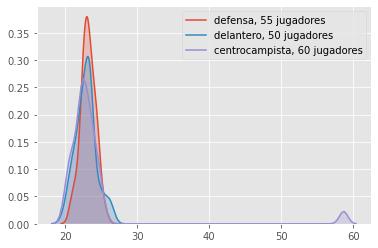

In [687]:
label_defensa = "defensa, {0} jugadores".format(len(df_imc_ok[df_imc_ok.Posición == 'defensa']))
label_delantero = "delantero, {0} jugadores".format(len(df_imc_ok[df_imc_ok.Posición == 'delantero']))
label_centrocampista = "centrocampista, {0} jugadores".format(len(df_imc_ok[df_imc_ok.Posición == 'centrocampista']))

ax5= sns.kdeplot(df_imc_ok[df_imc_ok['Posición'] == 'defensa']['imc'],
            label=label_defensa, shade=True)

ax5= sns.kdeplot(df_imc_ok[df_imc_ok['Posición'] == 'delantero']['imc'],
            label=label_delantero,shade=True)
ax5= sns.kdeplot(df_imc_ok[df_imc_ok['Posición'] == 'centrocampista']['imc'],
            label=label_centrocampista,shade=True)

EN el proceso de creación observamos que existe o un outlier o un dato mal grabado. Vamos a eliminar estos valores

In [705]:
df_imc_ok2 = df_imc_ok[(df_imc_ok["imc"] < 40) &(df_imc_ok["imc"] > 18)  ] 

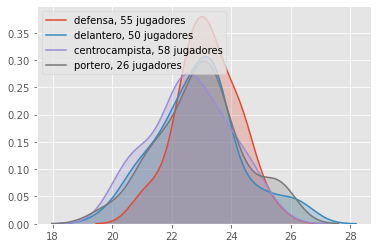

In [706]:
label_defensa = "defensa, {0} jugadores".format(len(df_imc_ok2[df_imc_ok2.Posición == 'defensa']))
label_delantero = "delantero, {0} jugadores".format(len(df_imc_ok2[df_imc_ok2.Posición == 'delantero']))
label_centrocampista = "centrocampista, {0} jugadores".format(len(df_imc_ok2[df_imc_ok2.Posición == 'centrocampista']))
label_portero = "portero, {0} jugadores".format(len(df_imc_ok2[df_imc_ok2.Posición == 'portero']))


ax5= sns.kdeplot(df_imc_ok2[df_imc_ok2['Posición'] == 'defensa']['imc'],
            label=label_defensa, shade=True)
ax5= sns.kdeplot(df_imc_ok2[df_imc_ok2['Posición'] == 'delantero']['imc'],
            label=label_delantero,shade=True)
ax5= sns.kdeplot(df_imc_ok2[df_imc_ok2['Posición'] == 'centrocampista']['imc'],
            label=label_centrocampista,shade=True)
ax5= sns.kdeplot(df_imc_ok2[df_imc_ok2['Posición'] == 'portero']['imc'],
            label=label_portero,shade=True)

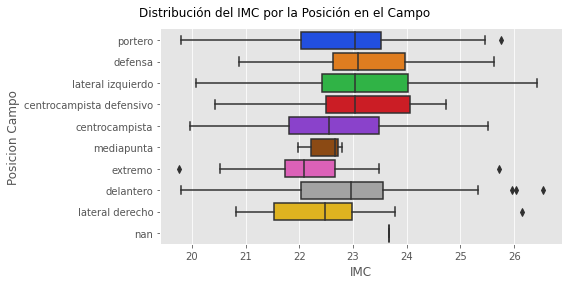

In [707]:

g = sns.catplot(x="imc", y="Posición", data=df_imc_ok2, kind='box',
                 height=4, aspect=2, palette='bright')


g.fig.subplots_adjust(top=.9)
g.fig.suptitle('Distribución del IMC por la Posición en el Campo')
g.set_ylabels("Posicion Campo")
g.set_xlabels("IMC");

Nos llama la atención la diferencia entre los laterales izquiero y derecho; con los siguientes gráficos vemos que los laterales derechos tienen un IMC significativamente menor que los laterales izquierdos y los defensas en general. Puede ser una buena vía de investigación ara estudiar lesiones etc...

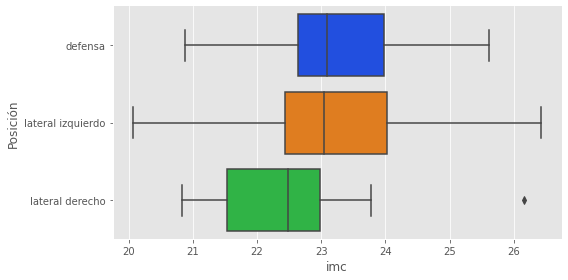

In [708]:
laterales = ['lateral izquierdo','lateral derecho','defensa'
            ]
df_laterales = df_imc_ok2[df_imc_ok2['Posición'].isin(laterales)]
g = sns.catplot(x="imc", y="Posición", data=df_laterales, kind='box',
                 height=4, aspect=2, palette='bright')

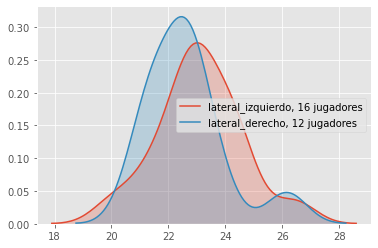

In [692]:
label_lateral_izquierdo = "lateral_izquierdo, {0} jugadores".format(len(df_imc_ok2[df_imc_ok2.Posición == 'lateral izquierdo']))
label_lateral_derecho  = "lateral_derecho, {0} jugadores".format(len(df_imc_ok2[df_imc_ok2.Posición == 'lateral derecho']))


ax5= sns.kdeplot(df_imc_ok2[df_imc_ok2['Posición'] == 'lateral izquierdo']['imc'],
            label=label_lateral_izquierdo,shade=True)
ax5= sns.kdeplot(df_imc_ok2[df_imc_ok2['Posición'] == 'lateral derecho']['imc'],
            label=label_lateral_derecho,shade=True)


### Analizamos los diferentes tipos de centrocampistas 

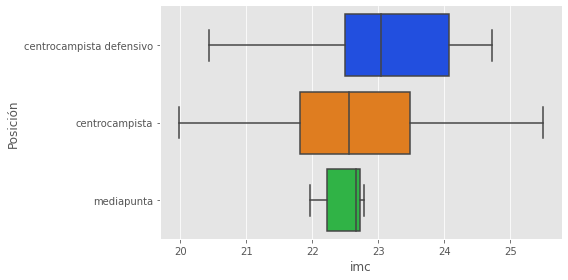

In [693]:
centro = ['centrocampista defensivo','centrocampista',
          'mediapunta'
            ]
df_centro= df_imc_ok2[df_imc_ok2['Posición'].isin(centro)]
g = sns.catplot(x="imc", y="Posición", data=df_centro, kind='box',
                 height=4, aspect=2, palette='bright')

En cambio en los centrocampistas no parece que existen grandes diferencias entre ellos, si cabe podemos distinguir que la media de los IMC en los cenytrocampistas defensivos es superior al resto, quizá la exigencia física del puesto lo justifique.

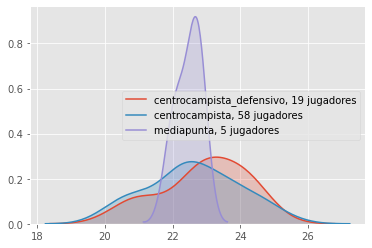

In [711]:
label_centro_def = "centrocampista_defensivo, {0} jugadores".format(len(df_imc_ok2[df_imc_ok2.Posición == 'centrocampista defensivo']))
label_centrocampista  = "centrocampista, {0} jugadores".format(len(df_imc_ok2[df_imc_ok2.Posición == 'centrocampista']))
label_mediapunta  = "mediapunta, {0} jugadores".format(len(df_imc_ok2[df_imc_ok2.Posición == 'mediapunta']))



ax5= sns.kdeplot(df_imc_ok2[df_imc_ok2['Posición'] == 'centrocampista defensivo']['imc'],
            label=label_centro_def,shade=True)
ax5= sns.kdeplot(df_imc_ok2[df_imc_ok2['Posición'] == 'centrocampista']['imc'],
            label=label_centrocampista,shade=True)
ax5= sns.kdeplot(df_imc_ok2[df_imc_ok2['Posición'] == 'mediapunta']['imc'],
            label=label_mediapunta,shade=True)

La muestra de mediapuntas es demasiado pequeña para extraer grandes conclusiones

### Analizamos los diferentes tipos de delanteros

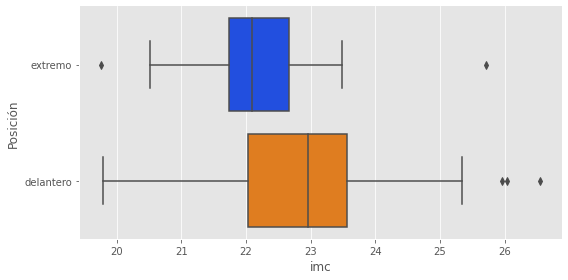

In [709]:
delantera = ['delantero','extremo'
            ]
df_delantero= df_imc_ok2[df_imc_ok2['Posición'].isin(delantera)]
g = sns.catplot(x="imc", y="Posición", data=df_delantero, kind='box',
                 height=4, aspect=2, palette='bright')

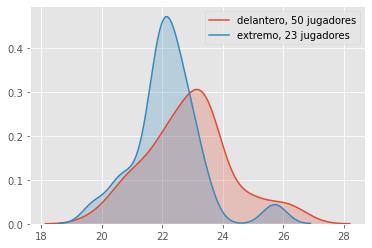

In [694]:
label_delantero = "delantero, {0} jugadores".format(len(df_imc_ok2[df_imc_ok2.Posición == 'delantero']))
label_extremo   = "extremo, {0} jugadores".format(len(df_imc_ok2[df_imc_ok2.Posición == 'extremo']))


ax5= sns.kdeplot(df_imc_ok2[df_imc_ok2['Posición'] == 'delantero']['imc'],
            label=label_delantero,shade=True)
ax5= sns.kdeplot(df_imc_ok2[df_imc_ok2['Posición'] == 'extremo']['imc'],
            label=label_extremo,shade=True)

Parece que la población de extremos tiene un IMC significatimente menor que la de los delanteros centros. Intuitivamente parece corresponder a jugadores más ágiles y livianos. Parece curioso una pequeña subpoblación de extremos cuyo IMC parece de media próximo  26 siendo. Veamos quienes son:

In [696]:
df_imc_ok2[df_imc_ok2['Posición'] == 'extremo']['imc'].describe()

count    23.000000
mean     22.179770
std       1.165268
min      19.753086
25%      21.731108
50%      22.093170
75%      22.670762
max      25.711662
Name: imc, dtype: float64

In [699]:
extremos_pesados = df_imc_ok2[(df_imc_ok2["imc"] > 24) &(df_imc_ok2["Posición"] == 'extremo')  ] 

In [700]:
extremos_pesados[['Nombre completo','Posición','Club','imc']]

,Nombre completo,Posición,Club,imc
423,Ignacio Gil de Pareja Vicent,extremo,Elche CF,25.711662


es un único futbolista, Nacho Gil. Tiene sobrepeso y juega en una posición dónde se premia la agilidad y rapidez. A comentar con el departamento médico del equipo.

In [713]:
delanteros_pesados= df_imc_ok2[(df_imc_ok2["imc"] > 24) &(df_imc_ok2["Posición"] == 'delantero')  ] 

In [714]:
delanteros_pesados[['Nombre completo','Posición','Club','imc']]

,Nombre completo,Posición,Club,imc
67,Lucas Pérez Martínez,delantero,West Ham United F. C.,25.335002
195,Luis Alberto Suárez Díaz,delantero,F. C. Barcelona,25.963048
196,Lionel Andrés Messi Cuccittini,delantero,F. C. Barcelona,24.913495
225,Willian José da Silva,delantero,Real Sociedad,26.035105
273,Luis Fernando Muriel Fruto,delantero,Sevilla FC,24.655910
320,Sergi Enrich Ametller,delantero,SD Eibar,24.724520
475,Roger Beyker Martínez Tobinson,delantero,C. América,26.543210
